# Model Tranning 

### 1.1 import data and required packages

### importing pandas numpy  matplotlib seaborn and warings library

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error,root_mean_squared_error
from catboost import CatBoostRegressor
# from xgboost import XGBRegressor
import warnings

### Import the CSV data as pandas dataframe

In [5]:
df=pd.read_csv('data/StudentsPerformance.csv')

### Show top 5 data

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and Y variables

In [7]:
x = df.drop(columns=['math score'],axis=1)

In [8]:
y= df['math score']

In [9]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [11]:
## create column Transformer with 3 types of transformers
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("standardScaler",numeric_transformer,num_features),
    ]
)


In [12]:
X = preprocessor.fit_transform(x)

In [15]:
## seprate dataset into train test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((800, 19), (200, 19))

## Create an evaluate function to give all metrics after model tranning

In [18]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = root_mean_squared_error(true,predicted)
    r_square = r2_score(true,predicted)
    return mae,mse,rmse,r_square

In [26]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "ElasticNet":ElasticNet(),
    "K-Neighbors Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "Cat Boost Regressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model =list(models.values())[i]
    model.fit(X_train,y_train)## Train model 
    
    
    
    ## make predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    ## Evaluate train and test dataset 
    model_train_mae,model_train_mse,model_train_rmse,model_train_r_square = evaluate_model(y_train,y_train_pred)

    model_test_mae,model_test_mse,model_test_rmse,model_test_r_square = evaluate_model(y_test,y_test_pred)
    
    
    
    print("-"*50)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print("-"*50)
    
    
    print("Model performance for tranning set ")
    print("Root mean square errro:{:.4f}".format(model_train_rmse))
    print(" mean square errro:{:.4f}".format(model_train_mse))
    print("mean absolute errro:{:.4f}".format(model_train_mae))
    print("R_square error:{:.4f}".format(model_train_r_square))
    print("+"*50)
    
    print("Model performance for testing set ")
    print("Root mean square errro:{:.4f}".format(model_test_rmse))
    print(" mean square errro:{:.4f}".format(model_test_mse))
    print("mean absolute errro:{:.4f}".format(model_test_mae))
    print("R_square error:{:.4f}".format(model_test_r_square))
    print("="*50)
    r2_list.append(model_test_r_square)
    
    

--------------------------------------------------
Linear Regression
--------------------------------------------------
Model performance for tranning set 
Root mean square errro:5.2815
 mean square errro:27.8947
mean absolute errro:4.2276
R_square error:0.8789
++++++++++++++++++++++++++++++++++++++++++++++++++
Model performance for testing set 
Root mean square errro:5.5720
 mean square errro:31.0468
mean absolute errro:4.3948
R_square error:0.8630
--------------------------------------------------
Lasso
--------------------------------------------------
Model performance for tranning set 
Root mean square errro:6.6102
 mean square errro:43.6951
mean absolute errro:5.1990
R_square error:0.8104
++++++++++++++++++++++++++++++++++++++++++++++++++
Model performance for testing set 
Root mean square errro:6.7021
 mean square errro:44.9186
mean absolute errro:5.3566
R_square error:0.8018
--------------------------------------------------
Ridge
-----------------------------------------------

In [27]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2_square']).sort_values(by=['R2_square'],ascending=False)

,Model name,R2_square
2,Ridge,0.863213
0,Linear Regression,0.862990
7,Cat Boost Regressor,0.857797
6,Random Forest Regressor,0.856942
8,AdaBoostRegressor,0.823481
1,Lasso,0.801773
4,K-Neighbors Regressor,0.790561
3,ElasticNet,0.730458
5,Decision Tree Regressor,0.727716


In [28]:
R_model = Ridge(fit_intercept=True)
R_model = R_model.fit(X_train,y_train)
y_pred = R_model.predict(X_test)
score = r2_score(y_test,y_pred)
print(f" accuracy of the model is : {score}")

 accuracy of the model is : 0.8632125686993388


## plot y_pred and y_test 

Text(0, 0.5, 'Predicted')

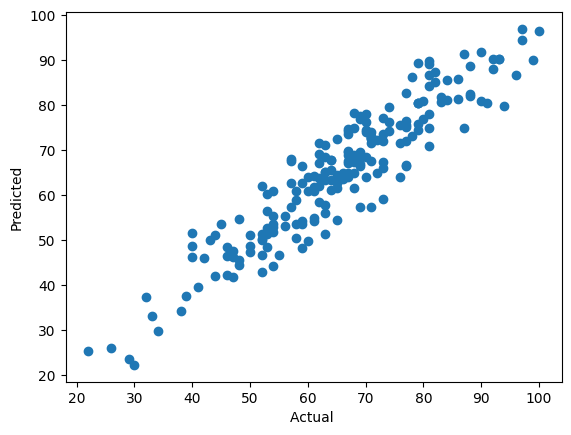

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual ")
plt.ylabel("Predicted")

<Axes: xlabel='math score'>

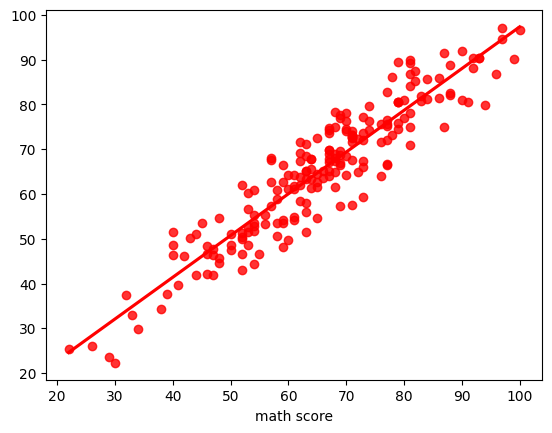

In [32]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

## difference between predicted and actual value 

In [36]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,difference
993,62,62.006107,-0.006107
859,87,74.897482,12.102518
298,40,48.680301,-8.680301
553,77,66.463769,10.536231
672,69,69.589120,-0.589120
...,...,...,...
679,63,63.380260,-0.380260
722,74,76.227390,-2.227390
215,84,81.242603,2.757397
653,65,61.659997,3.340003
